# 04 - Visualization of census data

Extended description: We will be playing with the UCI Census Dataset next week, but before that we need to have it in a clean form and also to gain some basic knowledge about the data itself. The assignment consists of these steps:

    Produce a pandas DataFrame with proper column names, an appropriate index and correct handling of missing data (e.g. use of None or NaN where appropriate)
    Visualize the correlation of the numerical variables
    Visualize the relationships between Age, Work Hours and earning <= or > 50k, displaying the effect of Sex, Race and Education as well


# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Label, CategoricalColorMapper,CDSView,IndexFilter
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
from bokeh.layouts import row
from ipywidgets import interact
%matplotlib inline

C:\Users\ysami\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

C:\Users\ysami\Anaconda3\lib\site-packages\plotly\widgets\graph_widget.py:13: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
output_notebook()

Loading BokehJS ...

# Importing Data

In [232]:
df = pd.read_table("adult.data",sep=',\s', na_values=["?"], names=[ "age","workclass","fnlwgt", "education","education-num",
            "marital-status","occupation","relationship", "race", "sex","capital-gain",
            "capital-loss","hours-per-week","native-country","salary"])


C:\Users\ysami\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Checking NaN

In [212]:
df.columns[df.isnull().any()].tolist()

['workclass', 'occupation', 'native-country']

In [213]:
df.isnull().any().count()

15

Droping NaN Rows

In [214]:
df=df.dropna()

# Data Inspection 

### Check Salary Distribution

In [215]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

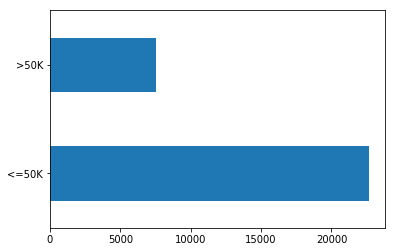

In [216]:
palette=[sns.color_palette()[0],sns.color_palette()[1],sns.color_palette()[1]]
df.salary.value_counts().plot(kind='barh', color=palette)

### Displaying categorical variables including Sex, Race and Education effect on Salary

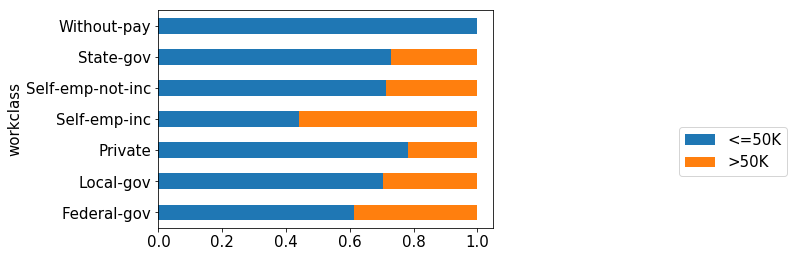

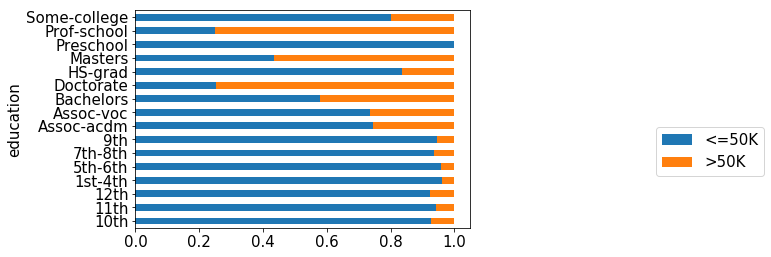

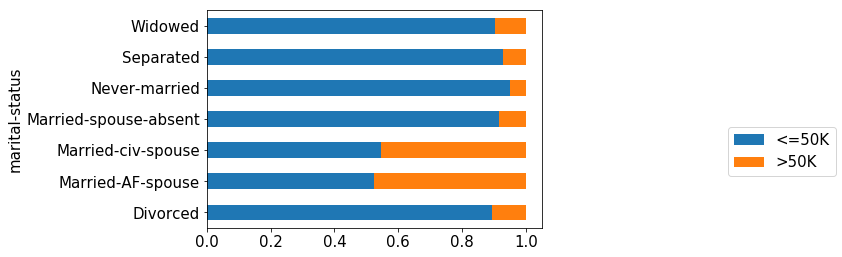

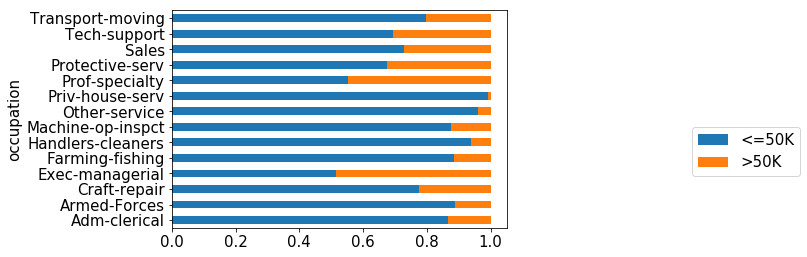

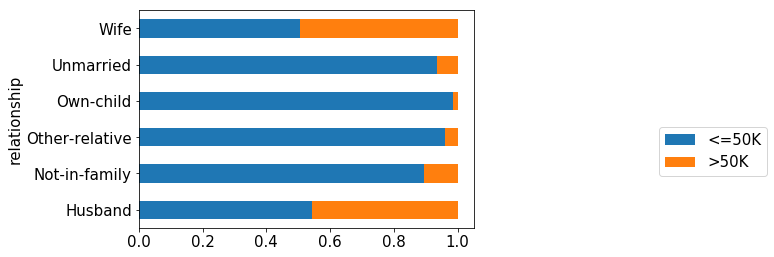

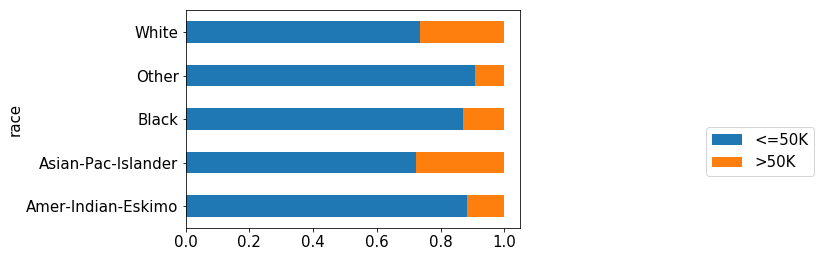

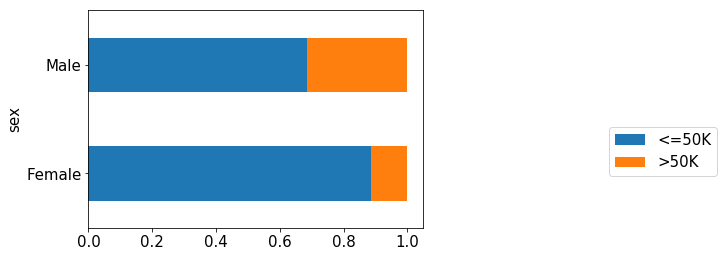

In [217]:
factorstoplot=['workclass','education','marital-status','occupation','relationship','race','sex']
for i in range(1,len(factorstoplot)+1):
    thisFactor=factorstoplot[i-1]
    sumfactor=df.groupby([thisFactor]).salary.count()
    temp=pd.DataFrame(df.groupby([thisFactor]).salary.value_counts()/sumfactor)
    temp['salary_range']=temp.index.get_level_values('salary')
    temp['type']=temp.index.get_level_values(thisFactor)
    temp.columns=['n','salary_range',thisFactor]
    temp=temp.pivot(index=thisFactor, columns='salary_range', values='n')
    temp['tot']=temp.sum(axis=1)
    temp.sort_values(by='tot', ascending=True)[['<=50K','>50K']].plot(kind='barh', stacked='True', color=sns.color_palette(), fontsize=15,legend=False)
    plt.legend( loc='upper right', bbox_to_anchor=(1.9, 0.5),fontsize=15)
    plt.ylabel(thisFactor, fontsize=15)

### Visualize the correlation of the numerical variables

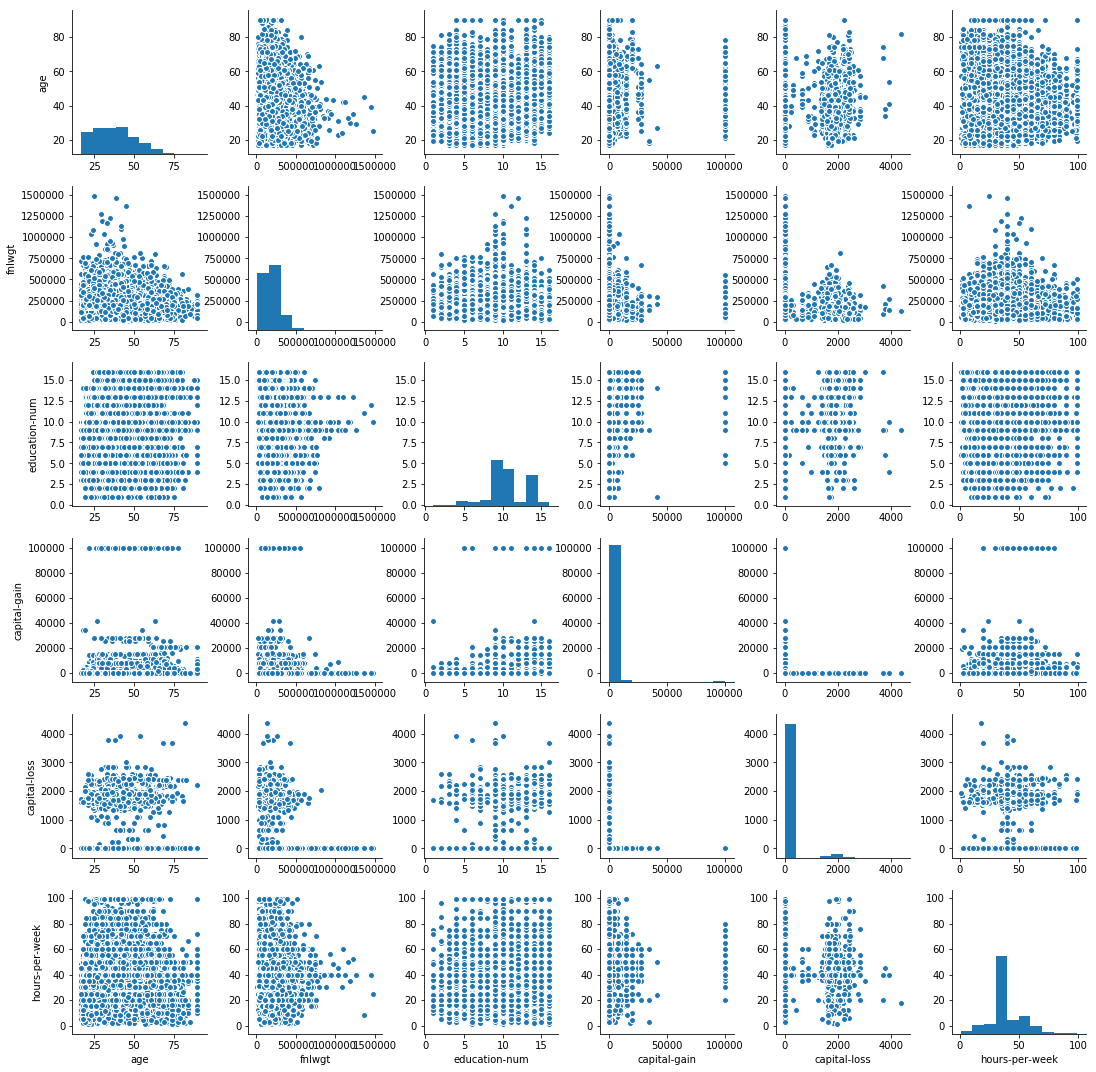

In [218]:
sns.pairplot(df.select_dtypes(include=[np.number]), dropna=True)

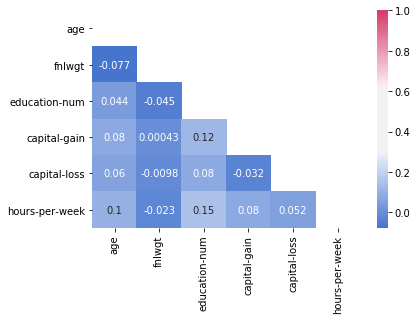

In [219]:
corr=df.select_dtypes(include=[np.number]).dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True), annot=True, mask=mask)

In [220]:
df.age.describe()

count    30161.000000
mean        38.437883
std         13.134882
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

## Displaying Age and Working hours effect on Salary

### Create age ranges of 10 to split the data for better visulization

In [221]:
temp_1=pd.DataFrame(df[df['salary']=='<=50K'].groupby('age').salary.value_counts())
temp_1['salary_range']=temp_1.index.get_level_values('salary')
temp_1['age_id']=temp_1.index.get_level_values('age')
temp_1['age_range']=np.nan

In [222]:
temp_2=pd.DataFrame(df[df['salary']=='>50K'].groupby('age').salary.value_counts())
temp_2['salary_range']=temp_2.index.get_level_values('salary')
temp_2['age_id']=temp_2.index.get_level_values('age')
temp_2['age_range']=np.nan

In [223]:
ranges=[17,30,40,50,60,70,80,90]

In [224]:
for i in range((len(ranges)-1)):
    temp_1[(temp_1['age_id']>=ranges[i]) & (temp_1['age_id']<=ranges[i+1])]=temp_1[(temp_1['age_id']>=ranges[i]) & (temp_1['age_id']<=ranges[i+1])].fillna(str(ranges[i])+'-'+str(ranges[i+1]))
    temp_2[(temp_2['age_id']>=ranges[i]) & (temp_2['age_id']<=ranges[i+1])]=temp_2[(temp_2['age_id']>=ranges[i]) & (temp_2['age_id']<=ranges[i+1])].fillna(str(ranges[i])+'-'+str(ranges[i+1]))

### Plot for Salaries <=50K by Age with a slider between data ranges from 0 to 6
0 from 17-30
1 from 30-40
2 from 40-50
3 from 50-60
4 from 60-70
5 from 70-80
6 from 80-90

In [225]:
from bokeh.palettes import Spectral5

age_indexes=temp_1['age_range'].unique()
source = ColumnDataSource(temp_1.loc[temp_1['age_range']==age_indexes[0],['salary','age_id']])
xr=temp_1.loc[temp_1['age_range']==age_indexes[0],'age_id'].unique()
xr=(xr[0],xr[len(xr)-1])
#group = temp_p.groupby(('age_id'))

p = figure(plot_height=250,plot_width=800, title='<=50K',  x_range=xr)
p.vbar(source=source, x='age_id', top='salary', width=0.5, line_color="white")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Ages"
p.yaxis.axis_label = "Number of Employees"
p.y_range.start = 0

show(p , notebook_handle=True)

C:\Users\ysami\Anaconda3\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [226]:
@interact(AgeRange=(0, 6))
def change_label(AgeRange=0):
    #label.text = str(AgeRange)
    # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html
    source.data = temp_1.loc[temp_1['age_range']==age_indexes[AgeRange],['salary','age_id']].to_dict("series")
    xr=temp_1.loc[temp_1['age_range']==age_indexes[AgeRange],'age_id'].unique()
    p.x_range.end=xr[len(xr)-1]
    p.x_range.start=xr[0]
    push_notebook()

A Jupyter Widget

### Plot for Salaries <=50K by Age with a slider between data ranges from 0 to 6

In [227]:
from bokeh.palettes import Spectral5
age_indexes=temp_2['age_range'].unique()
source = ColumnDataSource(temp_2.loc[temp_2['age_range']==age_indexes[0],['salary','age_id']])
xr=temp_2.loc[temp_2['age_range']==age_indexes[0],'age_id'].unique()
xr=(xr[0],xr[len(xr)-1])
p = figure(plot_height=250,plot_width=800, title='>50K',  x_range=xr)
p.vbar(source=source, x='age_id', fill_color='#FF6600', top='salary', width=0.5, line_color="white")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Ages"
p.yaxis.axis_label = "Number of Employees"
p.y_range.start = 0

show(p , notebook_handle=True)

C:\Users\ysami\Anaconda3\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [228]:
@interact(AgeRange=(0, 6))
def change_label_2(AgeRange=0):
    #label.text = str(AgeRange)
    # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html
    source.data = temp_2.loc[temp_2['age_range']==age_indexes[AgeRange],['salary','age_id']].to_dict("series")
    xr=temp_2.loc[temp_2['age_range']==age_indexes[AgeRange],'age_id'].unique()
    p.x_range.end=xr[len(xr)-1]
    p.x_range.start=xr[0]
    push_notebook()

A Jupyter Widget

In [229]:
hours_1=pd.DataFrame(df[df['salary']=='<=50K'].groupby('hours-per-week').salary.value_counts())
hours_1['salary_range']=hours_1.index.get_level_values('salary')
hours_1['hour']=hours_1.index.get_level_values('hours-per-week')

In [230]:
hours_2=pd.DataFrame(df[df['salary']=='>50K'].groupby('hours-per-week').salary.value_counts())
hours_2['salary_range']=hours_2.index.get_level_values('salary')
hours_2['hour']=hours_2.index.get_level_values('hours-per-week')

# Plot For Salaries by Working Hours per Week 

In [231]:
from bokeh.palettes import Spectral5
source_1 = ColumnDataSource(hours_1.loc[:,['salary','hour']])
source_2 = ColumnDataSource(hours_2.loc[:,['salary','hour']])

p = figure(plot_height=250, x_range=(1,100),title='<=50K')
p.vbar(source=source_1, x='hour', top='salary', width=5, line_color="white")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Hours Per Week"
p.yaxis.axis_label = "Number of Employees"
p.y_range.start = 0


p2 = figure(plot_height=250, x_range=(1,100),title='>50K')
p2.vbar(x='hour', top='salary',fill_color='#FF6600', width=5, line_color="white",  source=source_2)

p2.xgrid.grid_line_color = None
p2.xaxis.axis_label = "Hours Per Week"
p2.yaxis.axis_label = "Number of Employees"
p2.y_range.start = 0


show(row(p , p2))